# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [72]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #另一個會圖樣式套件
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [63]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [64]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [65]:
age_data = app_train[['TARGET','DAYS_BIRTH','AMT_INCOME_TOTAL']]
age_data.head()

,TARGET,DAYS_BIRTH,AMT_INCOME_TOTAL
0,1,9461,202500.0
1,0,16765,270000.0
2,0,19046,67500.0
3,0,19005,135000.0
4,0,19932,121500.0


In [66]:
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

C:\Users\Alex.Chiu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
age_data.head()

,TARGET,DAYS_BIRTH,AMT_INCOME_TOTAL,YEARS_BIRTH
0,1,9461,202500.0,25.920548
1,0,16765,270000.0,45.931507
2,0,19046,67500.0,52.180822
3,0,19005,135000.0,52.068493
4,0,19932,121500.0,54.608219


In [68]:
age_data["equal_width_age"] = pd.cut(age_data["YEARS_BIRTH"], [0,20,30,50,60,100])

C:\Users\Alex.Chiu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
age_data.head()

,TARGET,DAYS_BIRTH,AMT_INCOME_TOTAL,YEARS_BIRTH,equal_width_age
0,1,9461,202500.0,25.920548,"(20, 30]"
1,0,16765,270000.0,45.931507,"(30, 50]"
2,0,19046,67500.0,52.180822,"(50, 60]"
3,0,19005,135000.0,52.068493,"(50, 60]"
4,0,19932,121500.0,54.608219,"(50, 60]"


In [70]:
grp = ['equal_width_age', 'TARGET']

grouped_df = age_data.groupby(grp)['AMT_INCOME_TOTAL'].mean()
grouped_df

equal_width_age  TARGET
(20, 30]         0         160850.484761
                 1         149242.957154
(30, 50]         0         180006.884262
                 1         176421.986285
(50, 60]         0         165292.810598
                 1         162608.938878
(60, 100]        0         139040.602830
                 1         136132.792119
Name: AMT_INCOME_TOTAL, dtype: float64

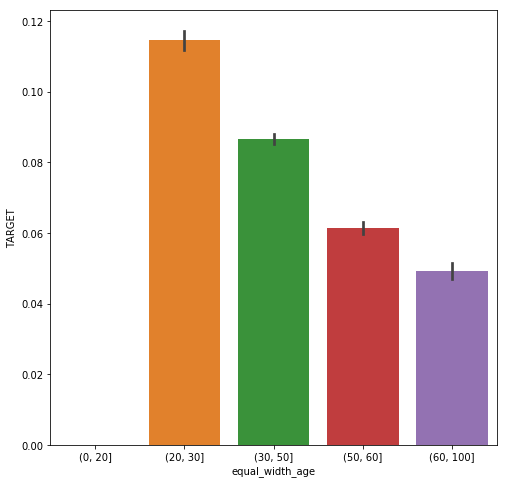

In [75]:
plt.figure(figsize = (8, 8))
sns.barplot(age_data['equal_width_age'],age_data['TARGET'])